# Netflix Data Analysis

https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("./Data/preprocessed_NetflixOriginals.csv", encoding="utf-8")

In [3]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year,Month,DayOfWeek,Quarter
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Mon,3
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Fri,3
2,The App,Science_fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Thu,4
3,The Open House,Horror/Thriller,2018-01-19,94,3.2,English,2018,1,Fri,1
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Fri,4


In [4]:
sns.set(style="darkgrid")

In [5]:
palette = sns.color_palette("pastel")
colors = palette.as_hex()

C:\Users\minni\AppData\Local\Temp\ipykernel_161408\2947475251.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores[top_score_genres].values, y=top_score_genres, palette="husl", hue=None)


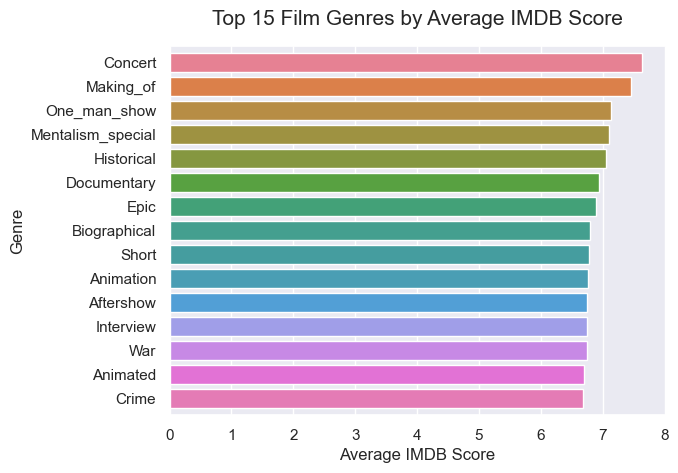

In [6]:
genres = []
scores = []

for index, row in df.iterrows():
    genre_list = row.Genre.split("/")
    score = row["IMDB Score"]
    for genre in genre_list:
        genres.append(genre)
        scores.append(score)

genre_score_df = pd.DataFrame({"Genre": genres, "IMDB Score": scores})
avg_scores = genre_score_df.groupby("Genre")["IMDB Score"].mean()
top_score_genres = avg_scores.nlargest(15).index

sns.barplot(x=avg_scores[top_score_genres].values, y=top_score_genres, palette="husl", hue=None)
plt.title("Top 15 Film Genres by Average IMDB Score", size=15, pad=15)
plt.margins(y=0.02)
plt.xlabel("Average IMDB Score")
plt.ylabel("Genre")
plt.savefig("./Image/avg_score_genre.png", bbox_inches="tight")

C:\Users\minni\AppData\Local\Temp\ipykernel_161408\218082605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genre_score_df["Genre"] = pd.Categorical(filtered_genre_score_df["Genre"], categories=top_score_genres, ordered=True)
C:\Users\minni\AppData\Local\Temp\ipykernel_161408\218082605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="IMDB Score", y="Genre", data=filtered_genre_score_df, palette="husl")


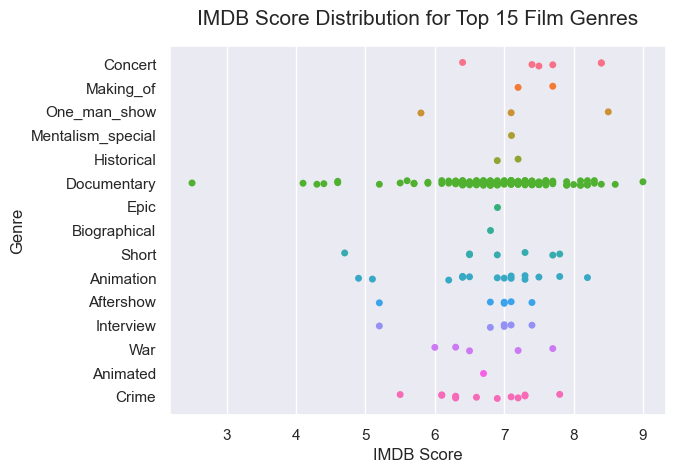

In [7]:
filtered_genre_score_df = genre_score_df[genre_score_df["Genre"].isin(top_score_genres)]
filtered_genre_score_df["Genre"] = pd.Categorical(filtered_genre_score_df["Genre"], categories=top_score_genres, ordered=True)

sns.stripplot(x="IMDB Score", y="Genre", data=filtered_genre_score_df, palette="husl")
plt.title("IMDB Score Distribution for Top 15 Film Genres", size=15, pad=15)
plt.margins(y=0.05)
plt.xlabel("IMDB Score")
plt.ylabel("Genre")
plt.savefig("./Image/score_genre_dist.png", bbox_inches="tight")

C:\Users\minni\AppData\Local\Temp\ipykernel_161408\2104354352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_count_genres.Genre, y=top_count_genres.Count, palette="husl")


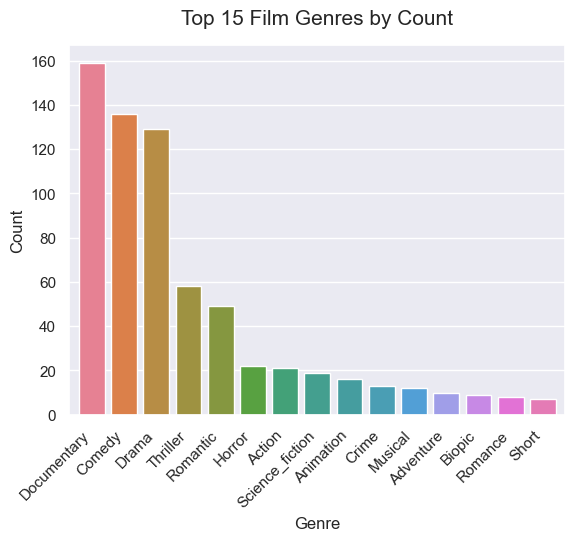

In [8]:
genre_count_df = pd.DataFrame({"Genre": genres}).value_counts().reset_index(name="Count")
top_count_genres = genre_count_df.nlargest(15, "Count")

sns.barplot(x=top_count_genres.Genre, y=top_count_genres.Count, palette="husl")
plt.title("Top 15 Film Genres by Count", size=15, pad=15)
plt.margins(x=0.02)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.savefig("./Image/genre_count.png", bbox_inches="tight")

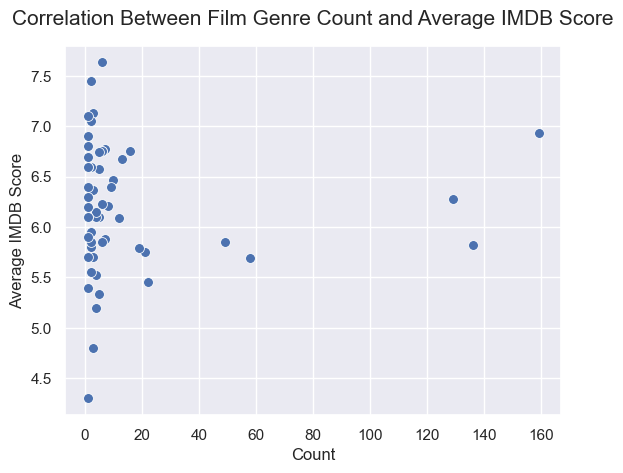

In [9]:
count_avg_score_df = pd.DataFrame({
    "Genre": genre_count_df.Genre,
    "Count": genre_count_df.Count,
    "Average IMDB Score": avg_scores.loc[genre_count_df.Genre].values
})
sns.scatterplot(x="Count", y="Average IMDB Score", data=count_avg_score_df, s=50)
plt.title("Correlation Between Film Genre Count and Average IMDB Score", size=15, pad=15)
plt.savefig("./Image/count_avg_score_v1.png", bbox_inches="tight")

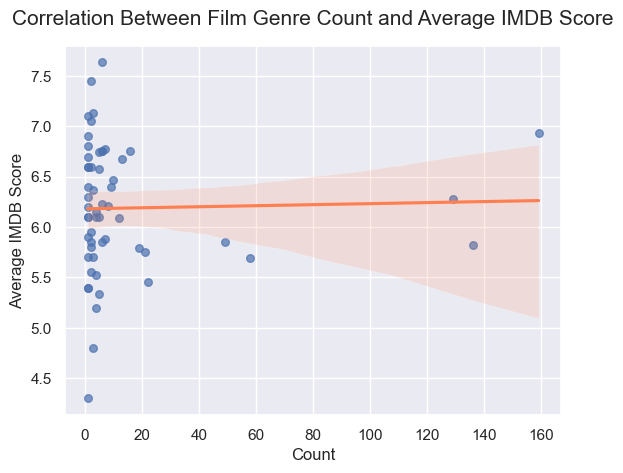

In [10]:
sns.regplot(x="Count", y="Average IMDB Score", data=count_avg_score_df, scatter_kws={"s": 30, "alpha": 0.7}, line_kws={"color": "coral"})
plt.title("Correlation Between Film Genre Count and Average IMDB Score", size=15, pad=15)
plt.savefig("./Image/count_avg_score_v2.png", bbox_inches="tight")

In [11]:
correlation, p_value = stats.pearsonr(count_avg_score_df["Count"], count_avg_score_df["Average IMDB Score"])

print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"p-value: {p_value:.2f}")

Pearson correlation coefficient: 0.03
p-value: 0.85


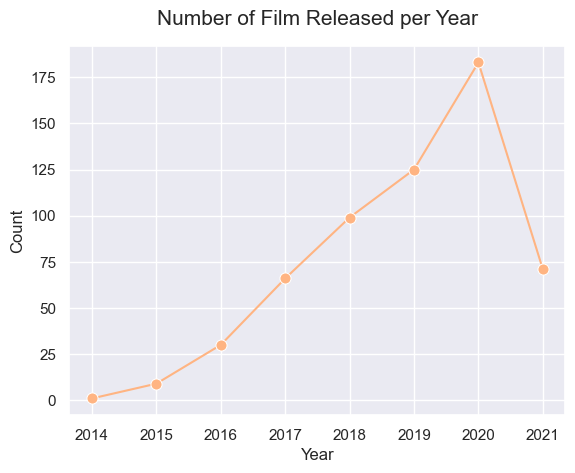

In [12]:
year_count = df.Year.value_counts()
sns.lineplot(data=year_count, marker="o", markersize=8, color=colors[1])
plt.title("Number of Film Released per Year", size=15, pad=15)
plt.xlabel("Year")
plt.ylabel("Count")
plt.savefig("./Image/year_count.png", bbox_inches="tight")

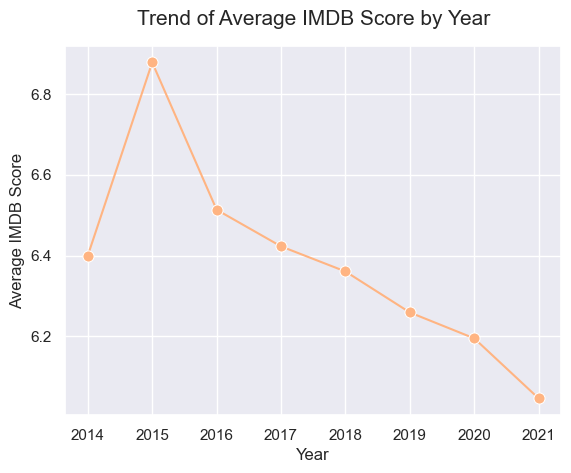

In [13]:
year_avg_score = df.groupby("Year")["IMDB Score"].mean().reset_index()
sns.lineplot(data=year_avg_score, x="Year", y="IMDB Score", marker="o", markersize=8, color=colors[1])
plt.title("Trend of Average IMDB Score by Year", size=15, pad=15)
plt.xlabel("Year")
plt.ylabel("Average IMDB Score")
plt.savefig("./Image/year_avg_score.png", bbox_inches="tight")

C:\Users\minni\AppData\Local\Temp\ipykernel_161408\1097373170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Quarter", palette="pastel", edgecolor=None, linewidth=0)


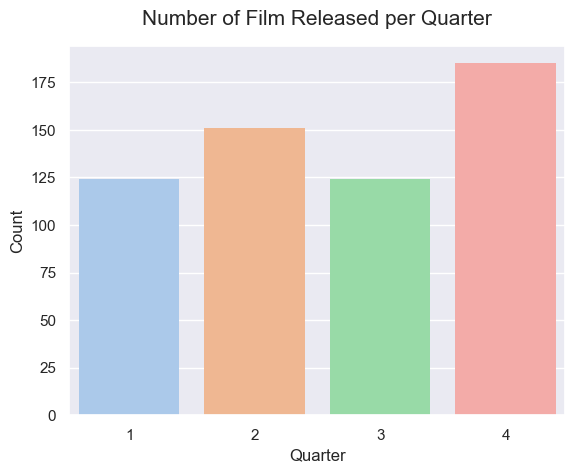

In [14]:
sns.countplot(data=df, x="Quarter", palette="pastel", edgecolor=None, linewidth=0)
plt.margins(x=0.02)
plt.title("Number of Film Released per Quarter", size=15, pad=15)
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.savefig("./Image/quarter_count.png", bbox_inches="tight")

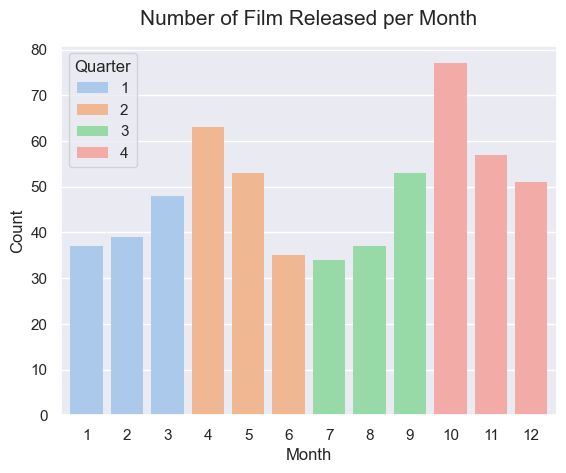

In [15]:
sns.countplot(data=df, x="Month", hue="Quarter", palette="pastel", edgecolor=None, linewidth=0)
plt.margins(x=0.02)
plt.title("Number of Film Released per Month", size=15, pad=15)
plt.xlabel("Month")
plt.ylabel("Count")
plt.savefig("./Image/month_count.png", bbox_inches="tight")

C:\Users\minni\AppData\Local\Temp\ipykernel_161408\2923741315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek", order=day_order, palette="pastel", edgecolor=None, linewidth=0)


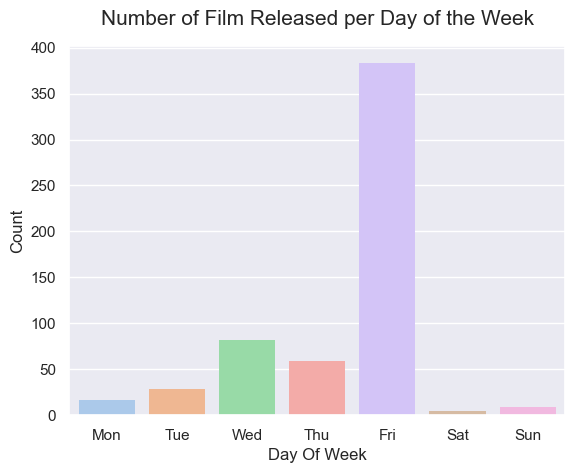

In [16]:
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.countplot(data=df, x="DayOfWeek", order=day_order, palette="pastel", edgecolor=None, linewidth=0)
plt.margins(x=0.02)
plt.title("Number of Film Released per Day of the Week", size=15, pad=15)
plt.xlabel("Day Of Week")
plt.ylabel("Count")
plt.savefig("./Image/day_of_week_count.png", bbox_inches="tight")

1. Hypothesis setting  
Null hypothesis: The average IMDB score difference between movies released on Friday and the remaining movies not released on Friday is 0.  
Alternative hypothesis: The average IMDB score difference between movies released on Friday and the remaining movies not released on Friday is greater than 0. (one-sided test)

2. Levene test  
Check whether the variances of two populations are the same through the levene test

In [17]:
fri_scores = df[df.DayOfWeek == "Fri"]["IMDB Score"]
other_scores = df[df.DayOfWeek != "Fri"]["IMDB Score"]

statistics, p_value = stats.levene(fri_scores, other_scores)
if p_value > 0.05:
    print("homoscedasticity")
else:
    print("heteroscedasticity")

heteroscedasticity


In [18]:
t_statistic, p_value = stats.ttest_ind(
    a=fri_scores,
    b=other_scores,
    alternative="greater",
    equal_var=False
)
if p_value < 0.05:
    print(f"p-value : {p_value}, Reject the null hypothesis")
else:
    print(f"p-value : {p_value}, Reject the alternative hypothesis")

p-value : 0.9366035047143305, Reject the alternative hypothesis


4. Statistical Decision  
Since the p-value is greater than 0.05, the alternative hypothesis is rejected.  
The difference in average IMDB scores between movies released on Friday and those not released on Friday is zero.

C:\Users\minni\AppData\Local\Temp\ipykernel_161408\606905966.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="DayOfWeek", y="IMDB Score", order=day_order, palette="pastel")


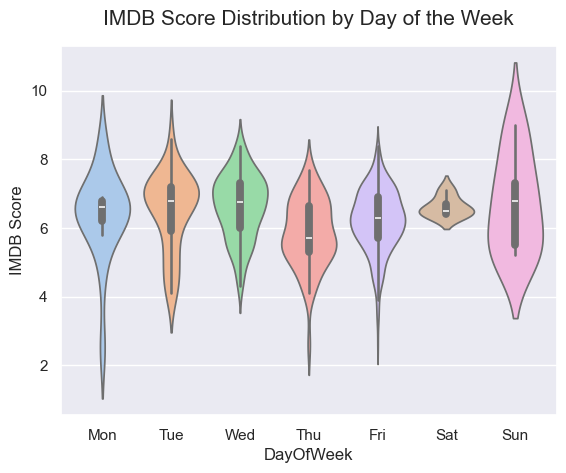

In [19]:
sns.violinplot(data=df, x="DayOfWeek", y="IMDB Score", order=day_order, palette="pastel")
plt.title("IMDB Score Distribution by Day of the Week", size=15, pad=15)
plt.margins(x=0.03)
plt.xlabel("DayOfWeek")
plt.ylabel("IMDB Score")
plt.savefig("./Image/day_of_week_score.png", bbox_inches="tight")

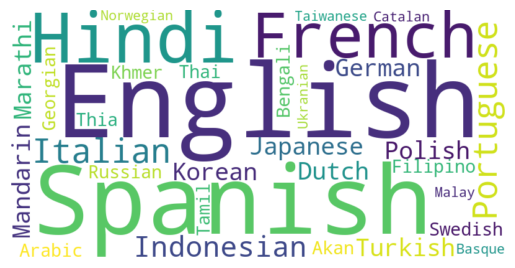

In [20]:
languages = df.Language.str.split("/").explode()
languages_count = languages.value_counts()
text = " ".join([f"{lang}" for lang, count in languages_count.items()])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("./Image/language_cloud_v1.png", bbox_inches="tight")

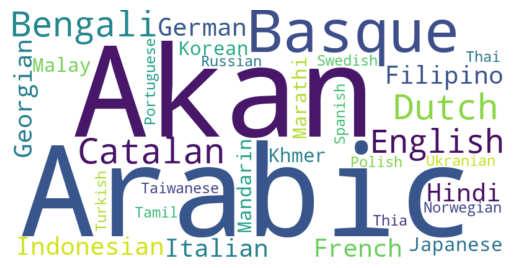

In [21]:
languages = []
scores = []

for index, row in df.iterrows():
    language_list = row.Language.split("/")
    score = row["IMDB Score"]
    for language in language_list:
        languages.append(language)
        scores.append(score)

language_score_df = pd.DataFrame({"Language": languages, "IMDB Score": scores})
lang_avg_scores = language_score_df.groupby("Language")["IMDB Score"].mean()
text = " ".join([f"{lang}" for lang, avg_score in lang_avg_scores.items()])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("./Image/language_cloud_v2.png", bbox_inches="tight")